# Laad alle functies in

In [2]:
%run /Users/pnl0rc8b@emea.royalahold.net/Functions_Rebuild

In [3]:
%run /Users/pnl0rc8b@emea.royalahold.net/Functions_Formateren

# Configureer Parameters

In [5]:
# PARAMETERS

ATTRIBUUT = "ndTypeOfGrain" # Selecteer Attribuut om te TRAINEN                                              ndTypeOfGrain       ndAnimalSpecies
SAVE_MODEL = True #True # Wil je een oud model overschrijven met een nieuwe?
EPOCHS = 100
Classes_threshold = 11
Overig_threshold = 300 # Class beneden deze threshold, zal worden toegevoegd aan class: 'overig'
Upsample_size = 8000
Upsample_size_validation = 2300
numerieke_features = ['FIBER']# ['FIBER','FIBER_was_missing','Fiber_UOM_class','PROTEINE'] # Deze numerieke features nemen we mee in het trainingsprocess, leeg is ook mogelijk --> []

balance_threshold_single_label = 500
upsample_single_label = 2000

# Indien andere numeriek features dan -> nutrienten is gewenst, zie dan:
# 'Functions_Rebuild -> Tables' voeg hier de extra Table dan toe

# Training Process loop

Amount of rows: (33455, 'Amount of columns: ', 134)
ATTRIBUUT: ndTypeOfGrain
Kleine classes die onder overige moeten: ['Amarant', 'Boekweit', 'Bulgur', 'Durum', 'Eenkoorn', 'Emmer', 'Freekeh', 'Gierst', 'Kamut', 'Quinoa', 'Sorghum', 'Spelt', 'Teff']
Grotere classes: ['EMPTY', 'Gerst', 'Haver', 'Mais', 'Rijst', 'Rogge', 'Tarwe']
null entries = 0
Shape van dataframe: (23424, 33)
null entries = 1474
<BarContainer object of 9 artists> <class 'matplotlib.container.BarContainer'>

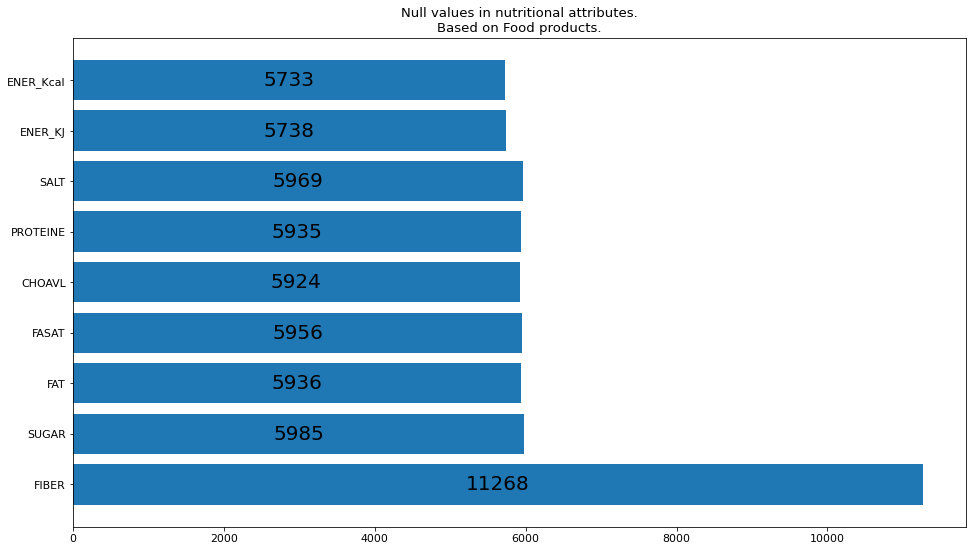

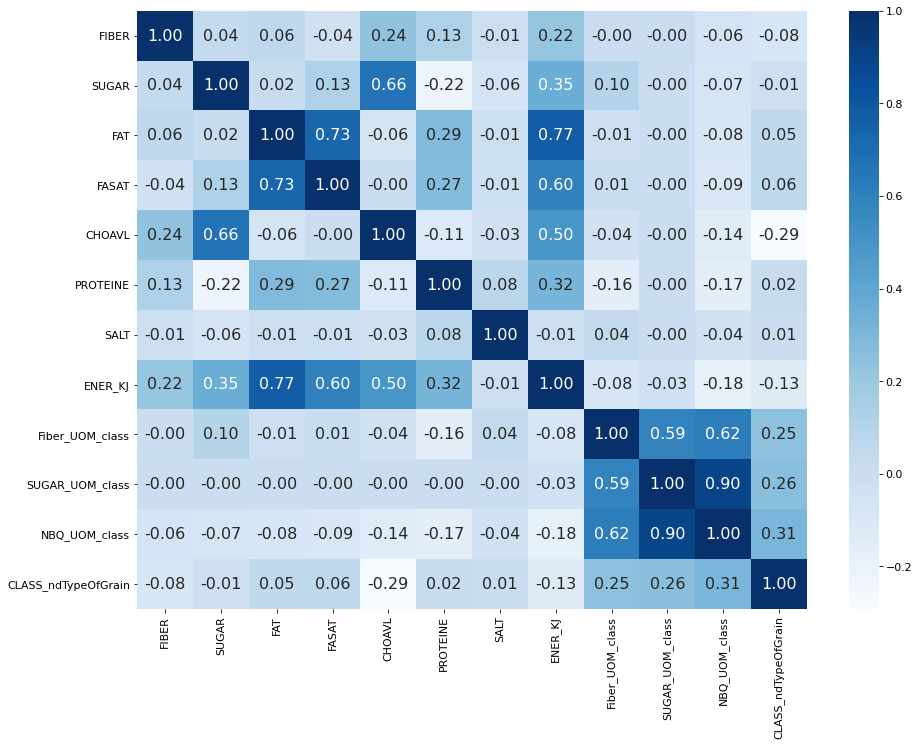

Vocab size: 41228.0
(13170, 7) (4390, 7) (4390, 7)
(13170, 8) (4390, 8) (4390, 8)

In [7]:
# Formateer
nd_controle = koppel_ndAttributen()
df_geformateerd, multi_label_flag,classes_available = create_overige_class(nd_controle, ATTRIBUUT,Classes_threshold, Overig_threshold)

DF_merged = koppel_preprocessed_text(df_geformateerd)
DF_merged = fix_empty_fields(DF_merged, ATTRIBUUT)
DF_merged = Correlation_matrix(DF_merged, ATTRIBUUT, show_nan_plot=True)

#Prepare for trainimg
vocab_size = get_vocabulary_size(DF_merged)

if multi_label_flag == True:
    X_train, X_val, X_test, y_train, y_val, y_test, targets = total_split(DF_merged, numerieke_features, ATTRIBUUT)
else:
    DF_merged = imbalance_check_single_label(classes_available, DF_merged, upsample_single_label)
    ytrain, yval, ytest, Xtrain_num, Xtrain_text, Xval_num, Xval_text, Xtest_num, Xtest_text = single_prep(numerieke_features, DF_merged, ATTRIBUUT)

In [8]:
if multi_label_flag == True:
    classes = DF_merged['overig'].value_counts().index.tolist() # haal [0,1] en [1,0] als class eruit
    X_train, y_train = balance_multi_label(targets, y_train, X_train, classes, Upsample_size) # Balance each sub-class
    X_val, y_val = balance_multi_label(targets, y_val, X_val, classes, Upsample_size_validation) # Balance each sub-class
    train_accuracies, val_accuracies, class_names, model = TRAINING_multi_label(X_train, X_val, X_test, y_train, y_val, y_test, numerieke_features, vocab_size, ATTRIBUUT, SAVE_MODEL) # Start training the model --> Multi label
else:
    model, model_history = TRAINING_single_label(Xtrain_num, Xtrain_text, Xval_num, Xval_text, Xtest_num, Xtest_text, vocab_size, EPOCHS, SAVE_MODEL)


Samples available = 7886
EMPTY
7886 13170
114 114
13284 13284
Samples available = 1464
Gerst
1464 13170
6536 6536
19820 19820
Samples available = 1580
Haver
1580 13170
6420 6420
26240 26240
Samples available = 3816
Mais
3816 13170
4184 4184
30424 30424
Samples available = 4116
Rijst
4116 13170
3884 3884
34308 34308
Samples available = 4268
Rogge
4268 13170
3732 3732
38040 38040
Samples available = 21289
Samples available = 4181
overig
4181 13170
3819 3819
41859 41859
Samples available = 2677
Samples available = 483
Gerst
483 4390
1817 1817
6207 6207
Samples available = 565
Haver
565 4390
1735 1735
7942 7942
Samples available = 1221
Mais
1221 4390
1079 1079
9021 9021
Samples available = 1029
Rijst
1029 4390
1271 1271
10292 10292
Samples available = 1217
Rogge
1217 4390
1083 1083
11375 11375
Samples available = 6312
Samples available = 1516
overig
1516 4390
784 784
12159 12159
**************** MULTI LABEL MODEL ***************

Save all models = True 
Numerieke features = ['FIBER'] 
Attribuut = ndTypeOfGrain
0it [00:00, ?it/s]

 EMPTY
(41859, 1) (4390, 1) (12159, 1) (41859, 301) (4390, 301) (12159, 301)
(41859, 2) (4390, 2) (12159, 2)
Model: "model"
__________________________________________________________________________________________________
 Layer (type) Output Shape Param # Connected to 
==================================================================================================
 input_2 (InputLayer) [(None, 301)] 0 [] 
 
 embedding (Embedding) (None, 301, 4) 164912 ['input_2[0][0]'] 
 
 flatten (Flatten) (None, 1204) 0 ['embedding[1][0]'] 
 
 dropout_1 (Dropout) (None, 1204) 0 ['flatten[1][0]'] 
 
 input_3 (InputLayer) [(None, 1)] 0 [] 
 
 concatenate (Concatenate) (None, 1205) 0 ['dropout_1[1][0]', 
 'input_3[0][0]'] 
 
 dense (Dense) (None, 100) 120600 ['concatenate[1][0]'] 
 
 dense_1 (Dense) (None, 50) 5050 ['dense[1][0]'] 
 
 dense_2 (Dense) (None, 100) 5100 ['dense_1[1][0]'] 
 
 dropout_2 (Dropout) (None, 100) 0 ['dense_2[1][0]'] 
 
 dense_3 (Dense) (None, 2) 202 ['dropout_2[1][0]'] 
 
==================================================================================================
Total params: 295,864
Trainable params: 295,864
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/30
1309/1309 - 6s - loss: 0.4310 - accuracy: 0.8108 - val_loss: 0.4045 - val_accuracy: 0.8247 - 6s/epoch - 4ms/step
Epoch 2/30
1309/1309 - 5s - loss: 0.3598 - accuracy: 0.8494 - val_loss: 0.5308 - val_accuracy: 0.7092 - 5s/epoch - 4ms/step
Epoch 3/30
1309/1309 - 5s - loss: 0.2767 - accuracy: 0.8869 - val_loss: 0.2588 - val_accuracy: 0.8835 - 5s/epoch - 3ms/step
Epoch 4/30
1309/1309 - 4s - loss: 0.1984 - accuracy: 0.9239 - val_loss: 0.2011 - val_accuracy: 0.9234 - 4s/epoch - 3ms/step
Epoch 5/30
1309/1309 - 4s - loss: 0.1588 - accuracy: 0.9431 - val_loss: 0.1620 - val_accuracy: 0.9440 - 4s/epoch - 3ms/step
Epoch 6/30
1309/1309 - 5s - loss: 0.1336 - accuracy: 0.9546 - val_loss: 1.3411 - val_accuracy: 0.6459 - 5s/epoch - 4ms/step
Epoch 7/30
1309/1309 - 5s - loss: 0.1179 - accuracy: 0.9595 - val_loss: 0.1228 - val_accuracy: 0.9590 - 5s/epoch - 3ms/step
Epoch 8/30
1309/1309 - 5s - loss: 0.1033 - accuracy: 0.9664 - val_loss: 0.1064 - val_accuracy: 0.9636 - 5s/epoch - 3ms/step
Epoch 9/30
1309/1309 - 5s - loss: 0.0924 - accuracy: 0.9700 - val_loss: 0.1707 - val_accuracy: 0.9468 - 5s/epoch - 3ms/step
Epoch 10/30
1309/1309 - 5s - loss: 0.0827 - accuracy: 0.9733 - val_loss: 0.1054 - val_accuracy: 0.9666 - 5s/epoch - 3ms/step
Epoch 11/30
1309/1309 - 5s - loss: 0.0755 - accuracy: 0.9757 - val_loss: 0.0816 - val_accuracy: 0.9752 - 5s/epoch - 4ms/step
Epoch 12/30
1309/1309 - 5s - loss: 0.0700 - accuracy: 0.9786 - val_loss: 0.1112 - val_accuracy: 0.9624 - 5s/epoch - 4ms/step
Epoch 13/30
1309/1309 - 5s - loss: 0.0674 - accuracy: 0.9795 - val_loss: 0.0744 - val_accuracy: 0.9759 - 5s/epoch - 4ms/step
Epoch 14/30
1309/1309 - 5s - loss: 0.0636 - accuracy: 0.9814 - val_loss: 0.

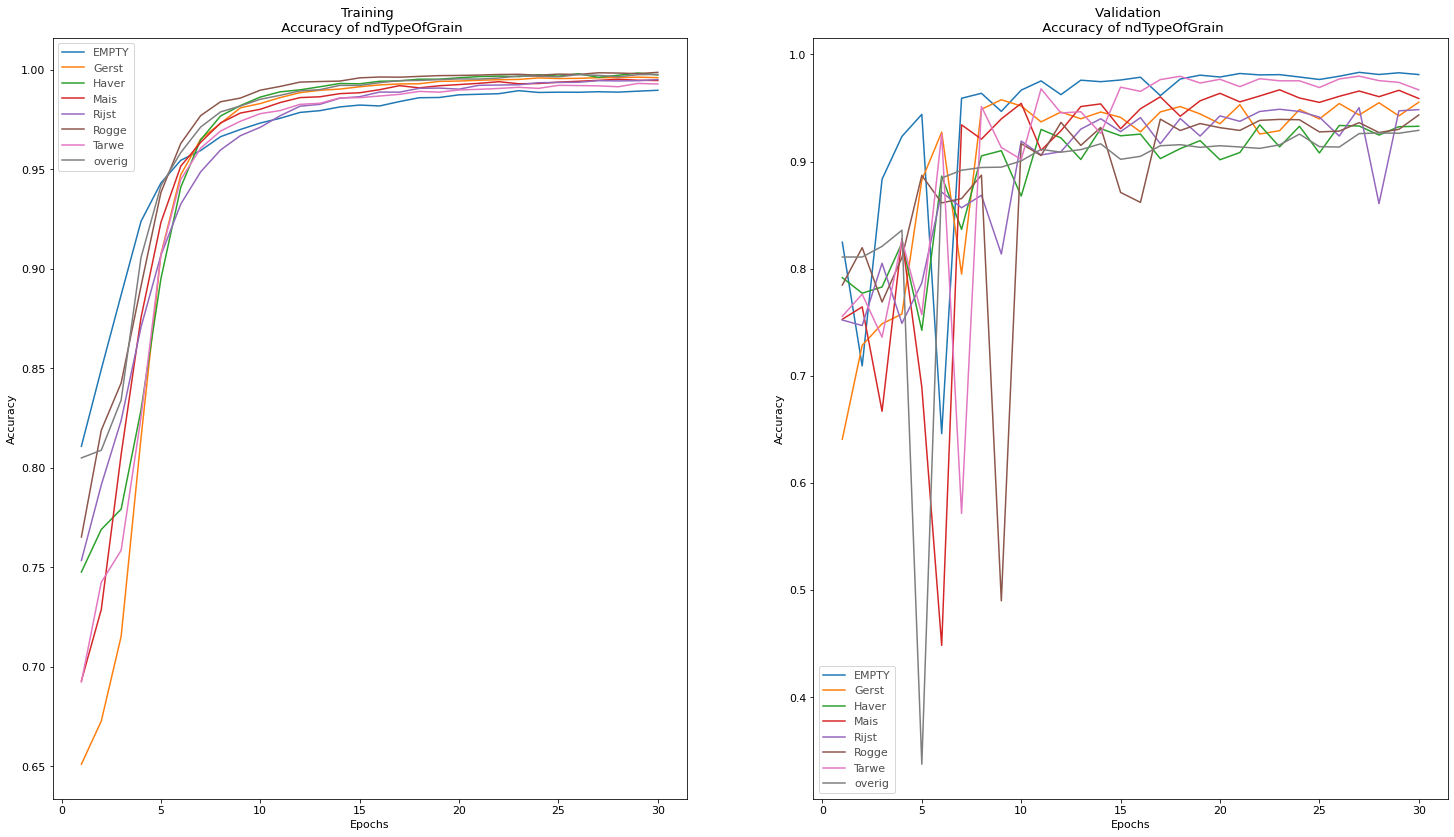

In [9]:
# Plot statistieken van de training fase
if multi_label_flag == True:
    plot_multiple_training(train_accuracies, val_accuracies, class_names, ATTRIBUUT)
else:
    plot_single_label_training(model, model_history, Xtest_num, Xtest_text, ytest, ATTRIBUUT, DF_merged)
    